In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_excel('KaspiDatasets.xlsx')
data

,Name,NFC,color,type_screen,dioganal,RAM_size,Processor,memory_capacity,Battery,Price
0,Apple iPhone 14 Pro Max 256Gb фиолетовый,Да,фиолетовый,"OLED, Super Retina XDR display с возможностью ...",6.7 дюйм,6 ГБ,6-ядерный Apple A16 Bionic,256 ГБ,3095 мАч,665 580 ₸
1,Apple iPhone 14 Pro 256Gb фиолетовый,Да,фиолетовый,"OLED, Super Retina XDR display с возможностью ...",6.1 дюйм,6 ГБ,6-ядерный Apple A16 Bionic,256 ГБ,3125 мАч,614 551 ₸
2,Apple iPhone 13 128Gb белый,Да,белый,"OLED, Super Retina XDR",6.1 дюйм,4 ГБ,6-ядерный Apple A15 Bionic,128 ГБ,3095 мАч,367 686 ₸
3,Xiaomi Redmi Note 10 Pro 8 ГБ/256 ГБ серый,Да,серый,"цветной AMOLED, сенсорный",6.67 дюйм,8 ГБ,8-ядерный Qualcomm Snapdragon 732G,256 ГБ,5020 мАч,128 655 ₸
4,Apple iPhone 13 128Gb черный,Да,черный,"OLED, Super Retina XDR",6.1 дюйм,4 ГБ,6-ядерный Apple A15 Bionic,128 ГБ,3095 мАч,366 600 ₸
...,...,...,...,...,...,...,...,...,...,...
1299,Apple iPhone SE 2020 256Gb Slim Box белый,Да,белый,"сенсорный, мультитач, IPS",4.7 дюйм,4 ГБ,Apple A13 Bionic,256 ГБ,1821 мАч,283 500 ₸
1300,OPPO Reno 8T 8 ГБ/256 ГБ оранжевый,Да,оранжевый,AMOLED,6.43 дюйм,8 ГБ,MediaTek Dimensity 810,256 ГБ,5000 мАч,234 990 ₸
1301,OnePlus 11R 16 ГБ/256 ГБ синий,Да,синий,AMOLED,6.74 дюйм,16 ГБ,Qualcomm Snapdragon 8+ Gen1 3.0GHz,256 ГБ,5000 мАч,335 000 ₸
1302,OnePlus 11R 16 ГБ/256 ГБ черный,Да,черный,AMOLED,6.74 дюйм,16 ГБ,Qualcomm Snapdragon 8+ Gen1 3.0GHz,256 ГБ,5000 мАч,339 900 ₸


In [3]:
data = data.dropna ()
data = data.reset_index(drop=True)
data

,Name,NFC,color,type_screen,dioganal,RAM_size,Processor,memory_capacity,Battery,Price
0,Apple iPhone 14 Pro Max 256Gb фиолетовый,Да,фиолетовый,"OLED, Super Retina XDR display с возможностью ...",6.7 дюйм,6 ГБ,6-ядерный Apple A16 Bionic,256 ГБ,3095 мАч,665 580 ₸
1,Apple iPhone 14 Pro 256Gb фиолетовый,Да,фиолетовый,"OLED, Super Retina XDR display с возможностью ...",6.1 дюйм,6 ГБ,6-ядерный Apple A16 Bionic,256 ГБ,3125 мАч,614 551 ₸
2,Apple iPhone 13 128Gb белый,Да,белый,"OLED, Super Retina XDR",6.1 дюйм,4 ГБ,6-ядерный Apple A15 Bionic,128 ГБ,3095 мАч,367 686 ₸
3,Xiaomi Redmi Note 10 Pro 8 ГБ/256 ГБ серый,Да,серый,"цветной AMOLED, сенсорный",6.67 дюйм,8 ГБ,8-ядерный Qualcomm Snapdragon 732G,256 ГБ,5020 мАч,128 655 ₸
4,Apple iPhone 13 128Gb черный,Да,черный,"OLED, Super Retina XDR",6.1 дюйм,4 ГБ,6-ядерный Apple A15 Bionic,128 ГБ,3095 мАч,366 600 ₸
...,...,...,...,...,...,...,...,...,...,...
1271,Xiaomi 12S Ultra 12 ГБ/512 ГБ зеленый,Да,зеленый,"LTPO2 AMOLED, HDR10+",6.73 дюйм,12 ГБ,Qualcomm Snapdragon 8+ Gen 1,512 ГБ,4860 мАч,579 000 ₸
1272,Apple iPhone SE 2020 256Gb Slim Box белый,Да,белый,"сенсорный, мультитач, IPS",4.7 дюйм,4 ГБ,Apple A13 Bionic,256 ГБ,1821 мАч,283 500 ₸
1273,OPPO Reno 8T 8 ГБ/256 ГБ оранжевый,Да,оранжевый,AMOLED,6.43 дюйм,8 ГБ,MediaTek Dimensity 810,256 ГБ,5000 мАч,234 990 ₸
1274,OnePlus 11R 16 ГБ/256 ГБ синий,Да,синий,AMOLED,6.74 дюйм,16 ГБ,Qualcomm Snapdragon 8+ Gen1 3.0GHz,256 ГБ,5000 мАч,335 000 ₸


In [4]:
data["RAM_size"]=data["RAM_size"].apply(lambda x: x.replace('ГБ', '')).astype('int')
data["memory_capacity"]=data["memory_capacity"].apply(lambda x: x.replace('ГБ', '')).astype('int')
data["dioganal"]=data["dioganal"].apply(lambda x: x.replace('дюйм', '')).astype('float')
data["Battery"]=data["Battery"].apply(lambda x: x.replace('мАч', '')).astype('int')

In [5]:
data["Price"]=data["Price"].apply(lambda x: x.replace('₸', '').replace(' ','')).astype('int')

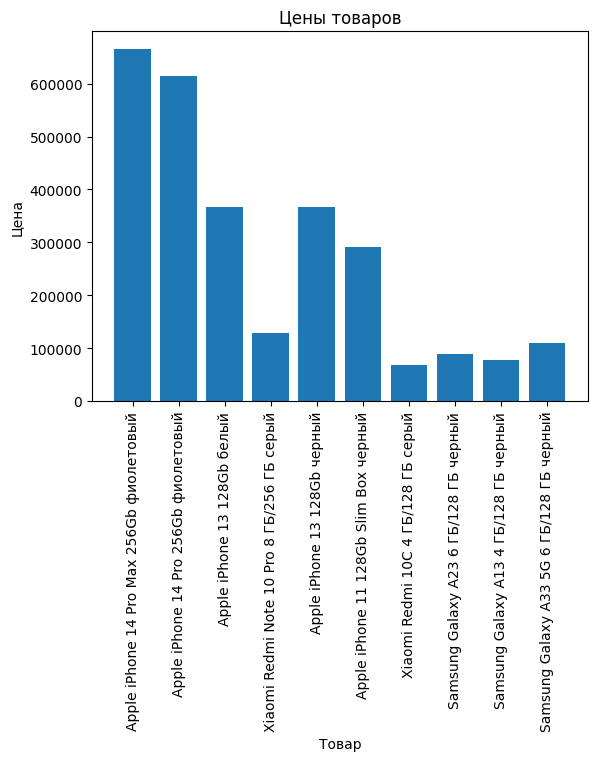

In [11]:
import matplotlib.pyplot as plt
Name = data['Name']
price = data['Price']

Name_10 = Name[:10]
price_10 = price[:10]

# Создание столбчатой диаграммы
plt.bar(Name_10, price_10)
plt.xticks(rotation=90, ha='center')
plt.xlabel('Товар')
plt.ylabel('Цена')
plt.title('Цены товаров')
plt.show()

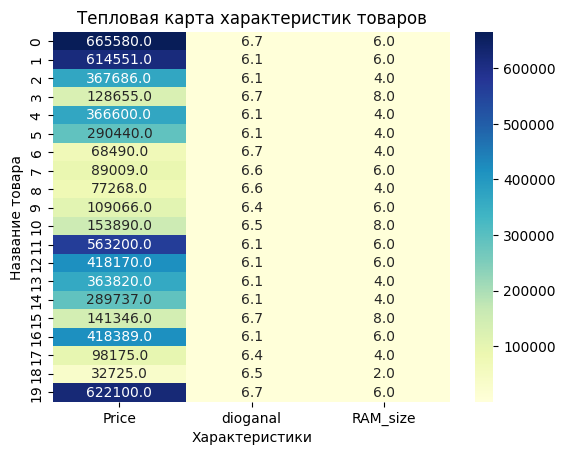

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data[:20])
heatmap_data = df[['Price', 'dioganal', 'RAM_size']]
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f")
plt.xlabel('Характеристики')
plt.ylabel('Название товара')
plt.title('Тепловая карта характеристик товаров')
plt.show()


In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1276 non-null   object 
 1   NFC              1276 non-null   object 
 2   color            1276 non-null   object 
 3   type_screen      1276 non-null   object 
 4   dioganal         1276 non-null   float64
 5   RAM_size         1276 non-null   int32  
 6   Processor        1276 non-null   object 
 7   memory_capacity  1276 non-null   int32  
 8   Battery          1276 non-null   int32  
 9   Price            1276 non-null   int32  
dtypes: float64(1), int32(4), object(5)
memory usage: 79.9+ KB


In [249]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [250]:
data.Name=le.fit_transform(data.Name)
data.NFC=le.fit_transform(data.NFC)
data.color=le.fit_transform(data.color)
data.type_screen=le.fit_transform(data.type_screen)
data.Processor=le.fit_transform(data.Processor)

In [251]:
# data.to_excel('Kaspi.xlsx', index=False)

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1276 non-null   int32  
 1   NFC              1276 non-null   int32  
 2   color            1276 non-null   int32  
 3   type_screen      1276 non-null   int32  
 4   dioganal         1276 non-null   float64
 5   RAM_size         1276 non-null   int32  
 6   Processor        1276 non-null   int32  
 7   memory_capacity  1276 non-null   int32  
 8   Battery          1276 non-null   int32  
 9   Price            1276 non-null   int32  
dtypes: float64(1), int32(9)
memory usage: 55.0 KB


In [253]:
data.describe()

,Name,NFC,color,type_screen,dioganal,RAM_size,Processor,memory_capacity,Battery,Price
count,1276.00,1276.00,1276.00,1276.00,1276.00,1276.00,1276.00,1276.00,1276.00,1276.00
mean,628.83,0.28,11.78,77.76,6.44,6.19,108.23,189.08,4396.78,291080.04
std,363.03,0.45,6.45,36.84,0.41,3.02,72.51,179.00,950.42,244418.30
min,0.00,0.00,0.00,0.00,4.70,1.00,0.00,4.00,1821.00,25990.00
25%,315.75,0.00,6.00,46.00,6.36,4.00,35.00,64.00,3775.00,88791.00
50%,628.50,0.00,14.00,80.00,6.53,6.00,97.50,128.00,4800.00,210000.00
75%,943.25,1.00,19.00,101.00,6.70,8.00,161.00,256.00,5000.00,443835.00
max,1259.00,1.00,19.00,154.00,7.80,18.00,274.00,1024.00,8580.00,1099890.00


In [254]:
data

,Name,NFC,color,type_screen,dioganal,RAM_size,Processor,memory_capacity,Battery,Price
0,231,0,18,89,6.70,6,29,256,3095,665580
1,202,0,18,89,6.10,6,29,256,3125,614551
2,79,0,1,87,6.10,4,28,128,3095,367686
3,1180,0,14,135,6.67,8,95,256,5020,128655
4,84,0,19,87,6.10,4,28,128,3095,366600
...,...,...,...,...,...,...,...,...,...,...
1271,1065,0,6,75,6.73,12,227,512,4860,579000
1272,247,0,1,128,4.70,4,131,256,1821,283500
1273,498,0,11,19,6.43,8,154,256,5000,234990
1274,515,0,15,19,6.74,16,229,256,5000,335000


In [255]:
# sns.pairplot(data)

In [256]:
dataset=data.values
dataset

array([[2.31000e+02, 0.00000e+00, 1.80000e+01, ..., 2.56000e+02,
        3.09500e+03, 6.65580e+05],
       [2.02000e+02, 0.00000e+00, 1.80000e+01, ..., 2.56000e+02,
        3.12500e+03, 6.14551e+05],
       [7.90000e+01, 0.00000e+00, 1.00000e+00, ..., 1.28000e+02,
        3.09500e+03, 3.67686e+05],
       ...,
       [4.98000e+02, 0.00000e+00, 1.10000e+01, ..., 2.56000e+02,
        5.00000e+03, 2.34990e+05],
       [5.15000e+02, 0.00000e+00, 1.50000e+01, ..., 2.56000e+02,
        5.00000e+03, 3.35000e+05],
       [5.16000e+02, 0.00000e+00, 1.90000e+01, ..., 2.56000e+02,
        5.00000e+03, 3.39900e+05]])

In [257]:
X=dataset[:,0:9]   #[0;9)
Y=dataset[:,9]  #9

In [258]:
from sklearn.preprocessing import MinMaxScaler

In [259]:
min_max_scaler=MinMaxScaler()
X_scale=min_max_scaler.fit_transform(X)
X_scale

array([[0.18347895, 0.        , 0.94736842, ..., 0.10583942, 0.24705882,
        0.18848942],
       [0.1604448 , 0.        , 0.94736842, ..., 0.10583942, 0.24705882,
        0.19292795],
       [0.06274821, 0.        , 0.05263158, ..., 0.10218978, 0.12156863,
        0.18848942],
       ...,
       [0.39555203, 0.        , 0.57894737, ..., 0.5620438 , 0.24705882,
        0.47033585],
       [0.40905481, 0.        , 0.78947368, ..., 0.83576642, 0.24705882,
        0.47033585],
       [0.40984909, 0.        , 1.        , ..., 0.83576642, 0.24705882,
        0.47033585]])

In [260]:
Y = Y.reshape(-1, 1)
Y

array([[665580.],
       [614551.],
       [367686.],
       ...,
       [234990.],
       [335000.],
       [339900.]])

In [261]:
Y_scale=min_max_scaler.fit_transform(Y)
Y_scale

array([[0.59557687],
       [0.54805941],
       [0.31818233],
       ...,
       [0.19461775],
       [0.2877456 ],
       [0.29230841]])

In [262]:
x_train, x_test, y_train, y_test = train_test_split(X_scale, Y_scale, test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1020, 9) (256, 9) (1020, 1) (256, 1)


In [263]:
from sklearn.metrics import mean_squared_error, r2_score

In [264]:
model = linear_model.LinearRegression()

In [265]:
model.fit(x_train, y_train)

LinearRegression()

In [266]:
y_pred = model.predict(x_test)

In [267]:
y_pred

array([[ 3.10502500e-01],
       [-6.32214483e-03],
       [ 1.97124394e-01],
       [ 1.47719515e-01],
       [ 3.55808445e-01],
       [ 3.67284863e-02],
       [-1.29786887e-01],
       [ 6.07278227e-01],
       [-1.88948467e-02],
       [ 3.58879246e-01],
       [ 4.13903804e-01],
       [ 3.29215213e-01],
       [ 3.36182198e-01],
       [ 8.38028874e-02],
       [ 6.82842555e-02],
       [ 2.05341586e-01],
       [ 3.29755249e-01],
       [ 3.36462538e-01],
       [ 2.99948035e-01],
       [ 3.88502448e-01],
       [ 3.12916349e-01],
       [ 4.58476977e-02],
       [ 3.18928925e-01],
       [ 9.16948615e-01],
       [-3.63087654e-02],
       [ 5.90653201e-01],
       [ 6.12506189e-01],
       [ 1.81103068e-01],
       [ 1.46761476e-02],
       [ 1.88444134e-01],
       [ 2.88315899e-01],
       [ 2.55028120e-01],
       [ 6.90835779e-01],
       [ 3.58142988e-01],
       [ 1.26481761e-01],
       [ 1.88877421e-01],
       [ 3.60291376e-01],
       [ 2.67988331e-01],
       [-2.6

Чем ближе MSE к нулю и R^2 к единице, тем лучше модель соответствует тестовым данным.

In [268]:
print('Mean squared error (MSE): %.5f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.5f'
      % r2_score(y_test, y_pred))

Mean squared error (MSE): 0.01198
Coefficient of determination (R^2): 0.76383


In [269]:
test=y_test[1:20]
test

array([[0.02207841],
       [0.39483192],
       [0.15724742],
       [0.37527703],
       [0.05098613],
       [0.02234845],
       [0.2038458 ],
       [0.0316184 ],
       [0.24559736],
       [0.67006239],
       [0.44231306],
       [0.17032312],
       [0.0315765 ],
       [0.0659838 ],
       [0.11546699],
       [0.17200577],
       [0.30636   ],
       [0.2156346 ],
       [0.4971692 ]])

In [270]:
pred=y_pred[1:20]
pred

array([[-0.00632214],
       [ 0.19712439],
       [ 0.14771952],
       [ 0.35580844],
       [ 0.03672849],
       [-0.12978689],
       [ 0.60727823],
       [-0.01889485],
       [ 0.35887925],
       [ 0.4139038 ],
       [ 0.32921521],
       [ 0.3361822 ],
       [ 0.08380289],
       [ 0.06828426],
       [ 0.20534159],
       [ 0.32975525],
       [ 0.33646254],
       [ 0.29994803],
       [ 0.38850245]])

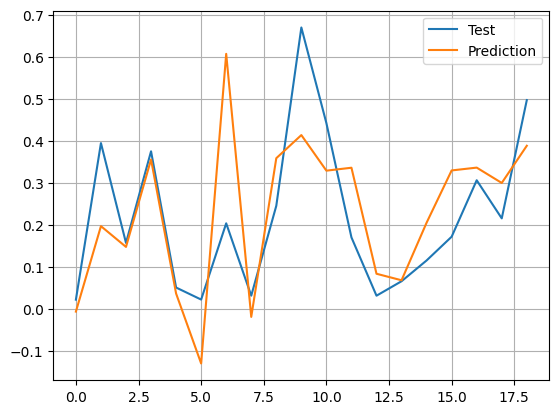

In [271]:
# test - массив тестовых значений, pred - массив прогнозных значений
plt.plot(test, label='Test')
plt.plot(pred, label='Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [272]:
test = test.flatten()
pred = pred.flatten()

In [273]:
# test - массив тестовых значений, pred - массив прогнозных значений
df = pd.DataFrame({'Test': test, 'Prediction': pred})
pd.options.display.float_format = '{:.2f}'.format
print(df)

    Test  Prediction
0   0.02       -0.01
1   0.39        0.20
2   0.16        0.15
3   0.38        0.36
4   0.05        0.04
5   0.02       -0.13
6   0.20        0.61
7   0.03       -0.02
8   0.25        0.36
9   0.67        0.41
10  0.44        0.33
11  0.17        0.34
12  0.03        0.08
13  0.07        0.07
14  0.12        0.21
15  0.17        0.33
16  0.31        0.34
17  0.22        0.30
18  0.50        0.39


In [274]:
# минимальное и максимальное значения в исходных данных
min_val = numpy.min(Y)
max_val = numpy.max(Y)
max_val

1099890.0

In [275]:
test_denorm = test * (max_val - min_val) + min_val

In [276]:
pred_denorm = pred * (max_val - min_val) + min_val

In [277]:
df = pd.DataFrame({'Test': test_denorm, 'Prediction': pred_denorm})
pd.options.display.float_format = '{:.2f}'.format
print(df)

        Test  Prediction
0   49700.00    19200.65
1  450000.00   237681.89
2  194858.00   184625.99
3  429000.00   408092.69
4   80744.00    65432.72
5   49990.00  -113388.14
6  244900.00   678146.09
7   59945.00     5698.82
8  289737.00   411390.42
9  745570.00   470481.29
10 500990.00   379534.22
11 208900.00   387016.06
12  59900.00   115985.92
13  96850.00    99320.46
14 149990.00   246506.33
15 210707.00   380114.16
16 354990.00   387317.12
17 257560.00   348104.19
18 559900.00   443202.78


In [278]:
# print(x_test[2][0])
# print(x_test[2][1])
# print(x_test[2][2])
# print(x_test[2][3])
# print(x_test[2][4])
# print(x_test[2][5])
# print(x_test[2][6])
# print(x_test[2][7])
# print(x_test[2][8])

In [1]:
# import tkinter as tk

# # Create a window
# window = tk.Tk()
# window.title("Machine Learning Model")

# # Add label and entry widgets for input
# tk.Label(window, text="Input 1").grid(row=0)
# input1_entry = tk.Entry(window)
# input1_entry.grid(row=0, column=1)

# tk.Label(window, text="Input 2").grid(row=1)
# input2_entry = tk.Entry(window)
# input2_entry.grid(row=1, column=1)

# tk.Label(window, text="Input 3").grid(row=2)
# input3_entry = tk.Entry(window)
# input3_entry.grid(row=2, column=1)

# tk.Label(window, text="Input 4").grid(row=3)
# input4_entry = tk.Entry(window)
# input4_entry.grid(row=3, column=1)

# tk.Label(window, text="Input 5").grid(row=4)
# input5_entry = tk.Entry(window)
# input5_entry.grid(row=4, column=1)

# tk.Label(window, text="Input 6").grid(row=5)
# input6_entry = tk.Entry(window)
# input6_entry.grid(row=5, column=1)

# tk.Label(window, text="Input 7").grid(row=6)
# input7_entry = tk.Entry(window)
# input7_entry.grid(row=6, column=1)

# tk.Label(window, text="Input 8").grid(row=7)
# input8_entry = tk.Entry(window)
# input8_entry.grid(row=7, column=1)

# tk.Label(window, text="Input 9").grid(row=8)
# input9_entry = tk.Entry(window)
# input9_entry.grid(row=8, column=1)
# # Define a function to get input values and make a prediction
# def predict():
#     input1 = float(input1_entry.get())
#     input2 = float(input2_entry.get())
#     input3 = float(input3_entry.get())
#     input4 = float(input4_entry.get())
#     input5 = float(input5_entry.get())
#     input6 = float(input6_entry.get())
#     input7 = float(input7_entry.get())
#     input8 = float(input8_entry.get())
#     input9 = float(input9_entry.get())
#     prediction = model.predict([[input1, input2, input3, input4, input5, input6, input7, input8, input9]])[0]
#     output_label.config(text=f"Prediction: {prediction}")

# # Add a button to make a prediction
# predict_button = tk.Button(window, text="Predict", command=predict)
# predict_button.grid(row=9)

# # Add a label to show the prediction
# output_label = tk.Label(window)
# output_label.grid(row=10)

# # Run the window
# window.mainloop()